# Monday, February 17th

Last time, we saw how to use `matplotlib` to create plots. As an example, let's plot $y=\sin(x)$ and $y=\cos(x)$ for $0 \leq x \leq 2\pi$.

In [1]:
import matplotlib.pyplot as plt

First, let's generate a list of $x$-values that we will use for plotting. Let's use `N=1000` data points.

In [2]:
from math import pi

x_list = []

a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 1000   # Number of sub-intervals to divide (a,b) into

dx = (b - a)/N   # Width of each sub-interval

for i in range(N+1):
    x = a + i*dx
    x_list.append(x)

Now, we want to plug each one of these $x$-values into the $\sin$ and $\cos$ functions:

In [4]:
from math import sin, cos

sin_x_list = []
cos_x_list = []

for x in x_list:
    sin_x_list.append(sin(x))
    cos_x_list.append(cos(x))

Now plot:

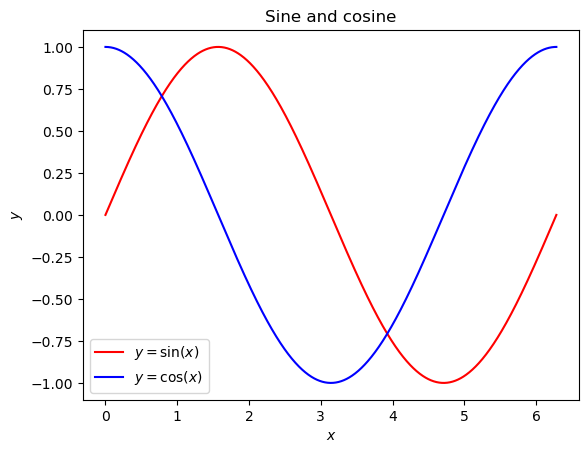

In [5]:
plt.plot(x_list, sin_x_list, 'r-', label='$y=\sin(x)$')
plt.plot(x_list, cos_x_list, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

**Exercise:** Rewrite the cells above to use list comprehensions instead `for` loops to generate `x_list`, `sin_x_list`, `cos_x_list`.

In [7]:
from math import pi, sin, cos

a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 1000   # Number of sub-intervals to divide (a,b) into
dx = (b - a)/N   # Width of each sub-interval

x_list = [a + i*dx for i in range(N+1)]
sin_x_list = [sin(x) for x in x_list]
cos_x_list = [cos(x) for x in x_list]

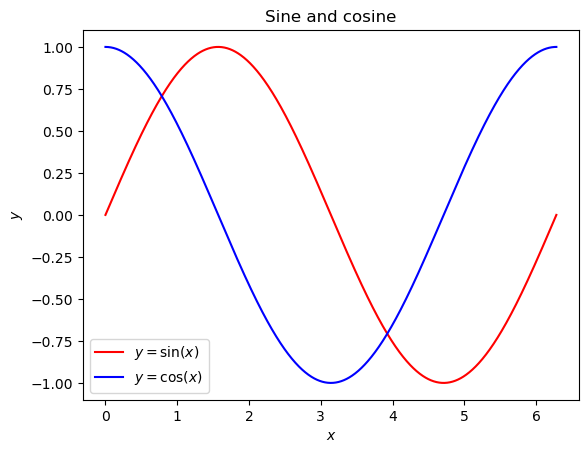

In [8]:
plt.plot(x_list, sin_x_list, 'r-', label='$y=\sin(x)$')
plt.plot(x_list, cos_x_list, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

Some thoughts:
 - It would be nice to be able to easily generate things like `x_list`, where we take evenly spaced points spanning an interval
 - It would be nice if we could easily apply a function to a list of data points (i.e. something like `sin(x_list)`).

In [9]:
sin(x_list)

TypeError: must be real number, not list

## NumPy

The NumPy module contains many useful tools for numerical calculations in Python.

In [10]:
import numpy as np

The basic building blocks from NumPy are **arrays**, which in many ways behave like lists. We can define an array using `np.array`:

In [12]:
my_array = np.array([1,2,3,4,5,6])
my_list = [1,2,3,4,5,6]

In [13]:
type(my_list)

list

In [14]:
type(my_array)

numpy.ndarray

We access elements and slices of arrays just like lists:

In [15]:
my_array[3]

4

In [16]:
my_array[-1]

6

In [17]:
my_array[1:5]

array([2, 3, 4, 5])

However, NumPy arrays behave very differently than lists with arithmetic operations:

In [18]:
my_list * 3

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

In [19]:
my_array * 3

array([ 3,  6,  9, 12, 15, 18])

We see that:
 - Multiplying a list by an integer concatenates the list by the integer number of times
 - Multiplying an array a number multiples each element of the array by that number

In general, arithmetic operations on arrays are done element-wise.

In [20]:
my_array + 4

array([ 5,  6,  7,  8,  9, 10])

In [21]:
my_array % 2

array([1, 0, 1, 0, 1, 0], dtype=int32)

In [22]:
my_array ** 3

array([  1,   8,  27,  64, 125, 216], dtype=int32)

In [23]:
3 ** my_array

array([  3,   9,  27,  81, 243, 729], dtype=int32)

Can we take the `sin` and `cos` of arrays?

In [24]:
sin(my_array)

TypeError: only size-1 arrays can be converted to Python scalars

Note: We imported the `sin` and `cos` functions from the `math` module, but they are not designed to work with arrays. Instead, we can either import `sin` and `cos` from the `numpy` module, or we can use `np.sin` and `np.cos`.

In [25]:
np.sin(my_array)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ])

What about generating arrays of evenly spaced points? We can use the `np.linspace`:

In [34]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

Repeating our first exercise now with arrays:

In [37]:
a = 0
b = 2*pi
N = 1000

x_array = np.linspace(a,b,N+1)
sin_x_array = np.sin(x_array)
cos_x_array = np.cos(x_array)

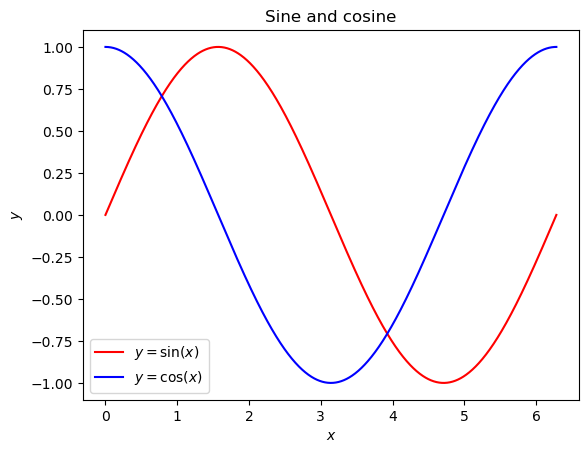

In [38]:
plt.plot(x_array, sin_x_array, 'r-', label='$y=\sin(x)$')
plt.plot(x_array, cos_x_array, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

Let's compare evaluation times between `for` loops, list comprehensions, and `numpy` arrays:

In [39]:
from time import time

In [42]:
a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 10**6

In [45]:
t0 = time()

x_list = []
dx = (b - a)/N   # Width of each sub-interval

for i in range(N+1):
    x = a + i*dx
    x_list.append(x)
    
sin_x_list = []
cos_x_list = []

for x in x_list:
    sin_x_list.append(sin(x))
    cos_x_list.append(cos(x))
    
t1 = time()

print(t1 - t0)

0.5829365253448486


In [46]:
t0 = time()

dx = (b - a)/N   # Width of each sub-interval
x_list = [a + i*dx for i in range(N+1)]
    
sin_x_list = [sin(x) for x in x_list]
cos_x_list = [cos(x) for x in x_list]
    
t1 = time()

print(t1 - t0)

0.3624556064605713


In [47]:
t0 = time()

x_array = np.linspace(a,b,N+1)
    
sin_x_array = np.sin(x_array)
cos_x_list = np.cos(x_array)
    
t1 = time()

print(t1 - t0)

0.047792911529541016


## How to generate arrays in NumPy

We've seen that we can use `np.array` to convert lists to arrays and `np.linspace` to generate arrays of equally spaced points. Some other options:
 - `np.zeros` can generate arrays full of zeros
 - `np.ones` can generate arrays full of 1s
 - `np.arange` works just like the normal `range` function, except that it returns an array instead

In [48]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [49]:
np.ones(7)

array([1., 1., 1., 1., 1., 1., 1.])

In [50]:
np.arange(2,10,3)

array([2, 5, 8])

Notice: the `np.zeros` function and `np.ones` function produce arrays filled with floats, while the `np.arange` function returns an array full of integers.

In general, unlike lists, NumPy arrays can only be filled with one datatype. You can check what datatype an array holds using the `.dtype` attribute:

In [51]:
my_array = np.zeros(5)
print(my_array.dtype)

float64


In [52]:
my_array = np.arange(5)
print(my_array.dtype)

int32


You can change the datatype when defining arrays using `np.zeros` or `np.ones` by using the `dtype` keyword argument:

In [53]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

In [57]:
np.zeros(10, dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False])

In [56]:
np.ones(10, dtype=bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Slicing with NumPy

Like with lists, we can take slices of NumPy arrays:

In [58]:
N = 50

my_list = [i for i in range(N)]
my_array = np.arange(N)

In [59]:
list_slice = my_list[1::2]
array_slice = my_array[1::2]

In [61]:
print(list_slice)
print(array_slice)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


What happens if we modify these slices?

In [63]:
list_slice[0] = 99
print('Modified slice:')
print(list_slice)
print('List:')
print(my_list)

Modified slice:
[99, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
List:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [64]:
array_slice[0] = 99
print('Modified slice:')
print(array_slice)
print('Array:')
print(my_array)

Modified slice:
[99  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]
Array:
[ 0 99  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


Observations:
 - List slices produce new lists unattached to the original. Changes to the list slice do not affect the original list.
 - Array slices provide "views" of the original array. Changes to the slice propogate back to the original array.

## Project 2: Pythagorean triples

In [65]:
ptriples = [[3, 4, 5],
[4, 3, 5],
[5, 12, 13],
[6, 8, 10],
[8, 6, 10],
[8, 15, 17],
[9, 12, 15],
[12, 5, 13],
[12, 9, 15],
[12, 16, 20],
[15, 8, 17],
[15, 20, 25],
[16, 12, 20],
[20, 15, 25]]

How can we plot the $(a,b)$ pairs from our Pythagorean triples?

In [66]:
a_list = []
b_list = []
c_list = []

for ptriple in ptriples:
    a_list.append(ptriple[0])
    b_list.append(ptriple[1])
    c_list.append(ptriple[2])

Text(0.5, 1.0, 'Pythagorean tuples $(a,b)$')

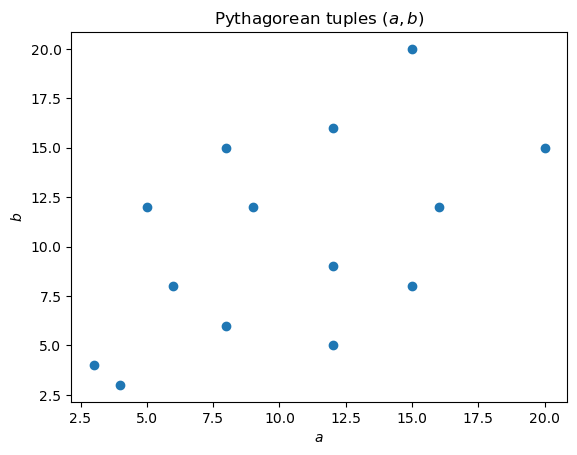

In [69]:
plt.plot(a_list, b_list, 'o')
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.title('Pythagorean tuples $(a,b)$')